### AI Bootcamp - June 2024 Cohort - Analyzing and Predicting Flight Delays
Documentation and Context: See the project's ReadMe.md file for documentation on the column names and purposes.

### What's in this workbook?
This is a starter Jupyter Notebook for the project team to use when building out various machine learning models. Each team member will create a copy of this notebook for their work. 

## Libraries Imported
* Pandas
* Numpy
* Matplotlib
* sklearn
    * StandardScaler
    * PCA
    * LabelEncoder

In [45]:
# Do imports
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_regression

### Read In Data to Dataframe

In [46]:
# Create DataFrame
df = pd.read_csv('../data/Airlines.csv')
df.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0


In [47]:
df.describe()

,id,Flight,DayOfWeek,Time,Length,Delay
count,539383.00000,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000
mean,269692.00000,2427.928630,3.929668,802.728963,132.202007,0.445442
std,155706.60446,2067.429837,1.914664,278.045911,70.117016,0.497015
min,1.00000,1.000000,1.000000,10.000000,0.000000,0.000000
25%,134846.50000,712.000000,2.000000,565.000000,81.000000,0.000000
50%,269692.00000,1809.000000,4.000000,795.000000,115.000000,0.000000
75%,404537.50000,3745.000000,5.000000,1035.000000,162.000000,1.000000
max,539383.00000,7814.000000,7.000000,1439.000000,655.000000,1.000000


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539383 entries, 0 to 539382
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           539383 non-null  int64 
 1   Airline      539383 non-null  object
 2   Flight       539383 non-null  int64 
 3   AirportFrom  539383 non-null  object
 4   AirportTo    539383 non-null  object
 5   DayOfWeek    539383 non-null  int64 
 6   Time         539383 non-null  int64 
 7   Length       539383 non-null  int64 
 8   Delay        539383 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 37.0+ MB


In [49]:
len(df['AirportFrom'].unique())

293

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539383 entries, 0 to 539382
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           539383 non-null  int64 
 1   Airline      539383 non-null  object
 2   Flight       539383 non-null  int64 
 3   AirportFrom  539383 non-null  object
 4   AirportTo    539383 non-null  object
 5   DayOfWeek    539383 non-null  int64 
 6   Time         539383 non-null  int64 
 7   Length       539383 non-null  int64 
 8   Delay        539383 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 37.0+ MB


### Preprocessing: Encoding 'AirportFrom', 'AirportTo', 'Airline' Columns

In [51]:
airport_codes = df['AirportFrom'].unique()
airport_codes

array(['SFO', 'PHX', 'LAX', 'ANC', 'LAS', 'SLC', 'DEN', 'ONT', 'FAI',
       'BQN', 'PSE', 'HNL', 'BIS', 'IYK', 'EWR', 'BOS', 'MKE', 'GFK',
       'OMA', 'GSO', 'LMT', 'SEA', 'MCO', 'TPA', 'DLH', 'MSP', 'FAR',
       'MFE', 'MSY', 'VPS', 'BWI', 'MAF', 'LWS', 'RST', 'ALB', 'DSM',
       'CHS', 'MSN', 'JAX', 'SAT', 'PNS', 'BHM', 'LIT', 'SAV', 'BNA',
       'ICT', 'ECP', 'DHN', 'MGM', 'CAE', 'PWM', 'ACV', 'EKO', 'PHL',
       'ATL', 'PDX', 'RIC', 'BTR', 'HRL', 'MYR', 'TUS', 'SBN', 'CAK',
       'TVC', 'CLE', 'ORD', 'DAY', 'MFR', 'BTV', 'TLH', 'TYS', 'DFW',
       'FLL', 'AUS', 'CHA', 'CMH', 'LRD', 'BRO', 'CRP', 'LAN', 'PVD',
       'FWA', 'JFK', 'LGA', 'OKC', 'PIT', 'PBI', 'ORF', 'DCA', 'AEX',
       'SYR', 'SHV', 'VLD', 'BDL', 'FAT', 'BZN', 'RDM', 'LFT', 'IPL',
       'EAU', 'ERI', 'BUF', 'IAH', 'MCI', 'AGS', 'ABI', 'GRR', 'LBB',
       'CLT', 'LEX', 'MBS', 'MOD', 'AMA', 'SGF', 'AZO', 'ABE', 'SWF',
       'BGM', 'AVP', 'FNT', 'GSP', 'ATW', 'ITH', 'TUL', 'COS', 'ELP',
       'ABQ', 'SMF',

### Make a copy of the DataFrame for preprocessing

In [52]:
encoded_df = df.copy()

In [53]:
unique_codes = encoded_df['AirportFrom'].unique()
code_to_id = {code: idx for idx, code in enumerate(unique_codes, start=1)}

# Apply the mapping to create a new column with unique IDs
encoded_df['AirportFromID'] = encoded_df['AirportFrom'].map(code_to_id)
encoded_df['AirportToID'] = encoded_df['AirportTo'].map(code_to_id)

encoded_df.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,AirportFromID,AirportToID
0,1,CO,269,SFO,IAH,3,15,205,1,1,103
1,2,US,1558,PHX,CLT,3,15,222,1,2,109
2,3,AA,2400,LAX,DFW,3,20,165,1,3,72
3,4,AA,2466,SFO,DFW,3,20,195,1,1,72
4,5,AS,108,ANC,SEA,3,30,202,0,4,22


In [54]:
# Get unique airline codes
unique_airlines = encoded_df['Airline'].unique()

# Create a random mapping for each unique airline code
random.seed(42)  # Set a seed for reproducibility, remove if you want different random results each time
airline_to_id = {airline: random.randint(1000, 9999) for airline in unique_airlines}

# Apply the random mapping to the airline column
encoded_df['AirlineID'] = encoded_df['Airline'].map(airline_to_id)

encoded_df.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,AirportFromID,AirportToID,AirlineID
0,1,CO,269,SFO,IAH,3,15,205,1,1,103,2824
1,2,US,1558,PHX,CLT,3,15,222,1,2,109,1409
2,3,AA,2400,LAX,DFW,3,20,165,1,3,72,5506
3,4,AA,2466,SFO,DFW,3,20,195,1,1,72,5506
4,5,AS,108,ANC,SEA,3,30,202,0,4,22,5012


In [55]:
# Verify that we haven't lost data in creating the unique IDs
print(len(encoded_df["AirportFrom"].unique()))
print(len(encoded_df["AirportTo"].unique()))

293
293


In [56]:
# Drop all the categorical columns and the id column since that is a hard-coded index
encoded_df = encoded_df.drop(columns=['id', 'Airline', 'AirportFrom', 'AirportTo'])
encoded_df.head()

,Flight,DayOfWeek,Time,Length,Delay,AirportFromID,AirportToID,AirlineID
0,269,3,15,205,1,1,103,2824
1,1558,3,15,222,1,2,109,1409
2,2400,3,20,165,1,3,72,5506
3,2466,3,20,195,1,1,72,5506
4,108,3,30,202,0,4,22,5012


In [57]:
# Encode the Length as hours and rename it to make it clearer what it is
encoded_df['Flight_Duration_Hours'] = encoded_df['Length'] / 60

# Encode the Time column as hours and rename it to make it clear what it is
encoded_df['Departure_Time_Hour'] = encoded_df['Time'] / 60

# Drop the Time and Length columns since we don't need these for our features
encoded_df.drop(columns=['Length', 'Time'], inplace=True)

encoded_df.head()

,Flight,DayOfWeek,Delay,AirportFromID,AirportToID,AirlineID,Flight_Duration_Hours,Departure_Time_Hour
0,269,3,1,1,103,2824,3.416667,0.250000
1,1558,3,1,2,109,1409,3.700000,0.250000
2,2400,3,1,3,72,5506,2.750000,0.333333
3,2466,3,1,1,72,5506,3.250000,0.333333
4,108,3,0,4,22,5012,3.366667,0.500000


### Feature Engineering
After testing the models, we found we needed to do some control of our features to improve our accuracy

In [58]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539383 entries, 0 to 539382
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Flight                 539383 non-null  int64  
 1   DayOfWeek              539383 non-null  int64  
 2   Delay                  539383 non-null  int64  
 3   AirportFromID          539383 non-null  int64  
 4   AirportToID            539383 non-null  int64  
 5   AirlineID              539383 non-null  int64  
 6   Flight_Duration_Hours  539383 non-null  float64
 7   Departure_Time_Hour    539383 non-null  float64
dtypes: float64(2), int64(6)
memory usage: 32.9 MB


### Correlation

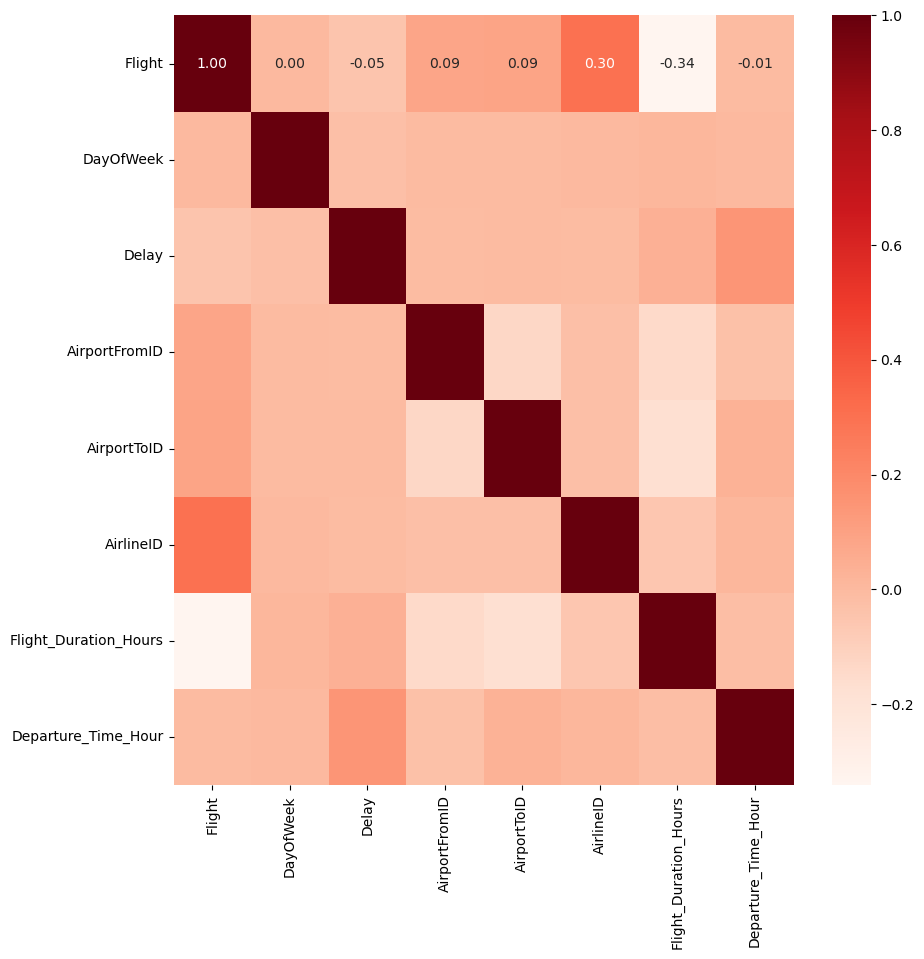

In [59]:
# Create a correlation matrix to see how features are related
plt.figure(figsize=(10,10))
cor = encoded_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds, fmt='.2f')
plt.show()

### Prepare the data for modeling

In [60]:
# Define X for training and testing and drop the Delay column since it's our target
X = encoded_df.copy()
X.drop('Delay', axis=1, inplace=True)
X.head()

,Flight,DayOfWeek,AirportFromID,AirportToID,AirlineID,Flight_Duration_Hours,Departure_Time_Hour
0,269,3,1,103,2824,3.416667,0.250000
1,1558,3,2,109,1409,3.700000,0.250000
2,2400,3,3,72,5506,2.750000,0.333333
3,2466,3,1,72,5506,3.250000,0.333333
4,108,3,4,22,5012,3.366667,0.500000


In [61]:
# Define the Delay column as our target
y = encoded_df['Delay']

In [62]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, shuffle=True)

### Identify the most impactful features
During testing, we found that some features were less important than others

[1.15246853e+03 3.70486797e+02 5.94373880e+01 8.04738613e+00
 2.37551131e+01 8.85711795e+02 1.24923930e+04]
Original shape: (539383, 7)
Selected shape: (539383, 5)


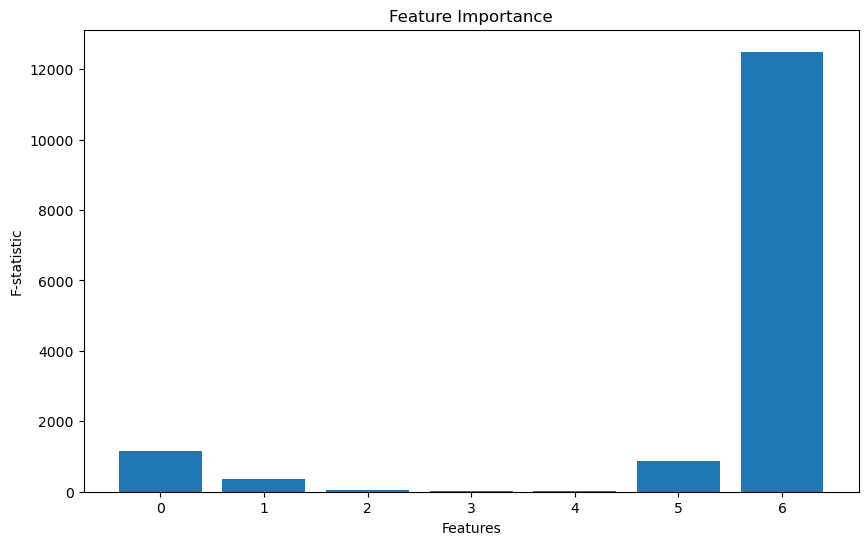

In [63]:
# Use SelectKBest to identify the most important features affecting the target variable 'Delay'
selector = SelectKBest(f_regression, k=5)
X_selected = selector.fit_transform(X, y)

print(selector.scores_)
print("Original shape:", X.shape)
print("Selected shape:", X_selected.shape)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(range(len(selector.scores_)), selector.scores_)
plt.xlabel('Features')
plt.ylabel('F-statistic')
plt.title('Feature Importance')
plt.show()

### Create CSV to be used for models
We can now export the DataFrame we've made to a CSV to be imported into other Jupyter Notebooks for creating and testing machine learning models. This CSV will NOT include any custom features we've created and only some basic encoding for handling time. To use the feature engineering set, see the Jupyter Notebook named **feature_eng_data_prep.ipynb** in the **data_processing** folder or the CSV file created from it: **feature_eng_encoded.csv** in the **data** folder.

In [64]:
# Export the encoded data to a CSV file
encoded_df.to_csv('../data/simple_encoded_airlines.csv', index=False)